In [4]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

# 1- exploring sources of data

## 1.1 source - superstore

### General

In [5]:
df_1 = pd.read_csv('../Datasets/raw/Superstore.csv', 
                   encoding='windows-1252', 
                   parse_dates=["Order Date", "Ship Date"])

In [6]:
df_1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [7]:
df_1.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


### row id, order id, product id

In [8]:
# checking potential unique rows 
print('number of rows: {}'.format(df_1.shape[0]))

print("Row ID #unique: {}".format(df_1['Row ID'].nunique()))
print("Order ID #unique: {}".format(df_1['Order ID'].nunique()))
print("Product ID #unique: {}".format(df_1['Product ID'].nunique()))

number of rows: 9994
Row ID #unique: 9994
Order ID #unique: 5009
Product ID #unique: 1862


`note` order id is not unique for every row

`insight` Row ID refers to order-product/ unique entry

In [9]:
vc = df_1['Order ID'].value_counts() 
vc[vc > 1]

CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
CA-2015-131338    10
                  ..
CA-2016-115476     2
CA-2016-145625     2
CA-2016-111794     2
CA-2016-142370     2
CA-2015-120341     2
Name: Order ID, Length: 2471, dtype: int64

`insight` most frequent order id in the data occurred 14 times 

In [10]:
df_1[df_1['Order ID']=="US-2016-108504"].nunique()

Row ID           11
Order ID          1
Order Date        1
Ship Date         1
Ship Mode         1
Customer ID       1
Customer Name     1
Segment           1
Country           1
City              1
State             1
Postal Code       1
Region            1
Product ID       11
Category          3
Sub-Category      7
Product Name     11
Sales            11
Quantity          6
Discount          1
Profit           11
dtype: int64

`note` seems that every row refers to order-product info, so if order has multiple products, that same order would have multiple entires in the df


In [11]:
vc_comb = df_1[["Order ID", "Product ID"]].value_counts()
vc_comb

Order ID        Product ID     
US-2014-150119  FUR-CH-10002965    2
CA-2015-103135  OFF-BI-10000069    2
CA-2016-129714  OFF-PA-10001970    2
CA-2017-152912  OFF-ST-10003208    2
CA-2016-140571  OFF-PA-10001954    2
                                  ..
CA-2015-163965  OFF-ST-10000918    1
CA-2015-164007  OFF-AP-10003849    1
                TEC-AC-10003433    1
CA-2015-164084  FUR-TA-10003569    1
US-2017-169551  TEC-PH-10001363    1
Length: 9986, dtype: int64

In [12]:
# set of duplicated combinations
vc_comb_dupl = vc_comb[vc_comb > 1]

In [13]:
for order_id_i, product_id_i in vc_comb_dupl.index:
    print("Combination: order {} / product {}".format(order_id_i, product_id_i))
    print(df_1[(df_1['Order ID']==order_id_i) & (df_1['Product ID']==product_id_i)].nunique())
    print()

Combination: order US-2014-150119 / product FUR-CH-10002965
Row ID           2
Order ID         1
Order Date       1
Ship Date        1
Ship Mode        1
Customer ID      1
Customer Name    1
Segment          1
Country          1
City             1
State            1
Postal Code      1
Region           1
Product ID       1
Category         1
Sub-Category     1
Product Name     1
Sales            1
Quantity         1
Discount         1
Profit           1
dtype: int64

Combination: order CA-2015-103135 / product OFF-BI-10000069
Row ID           2
Order ID         1
Order Date       1
Ship Date        1
Ship Mode        1
Customer ID      1
Customer Name    1
Segment          1
Country          1
City             1
State            1
Postal Code      1
Region           1
Product ID       1
Category         1
Sub-Category     1
Product Name     1
Sales            2
Quantity         2
Discount         1
Profit           2
dtype: int64

Combination: order CA-2016-129714 / product OFF-PA-100

In [14]:
df_1[(df_1['Order ID']=="CA-2015-103135") & (df_1['Product ID']=="OFF-BI-10000069")].nunique()

Row ID           2
Order ID         1
Order Date       1
Ship Date        1
Ship Mode        1
Customer ID      1
Customer Name    1
Segment          1
Country          1
City             1
State            1
Postal Code      1
Region           1
Product ID       1
Category         1
Sub-Category     1
Product Name     1
Sales            2
Quantity         2
Discount         1
Profit           2
dtype: int64

`insight` there exists duplicated data, evident by the presence of rows that have the same features except for ROW ID, and profit sales information (like above). this is illogical due to having same orders with the same product and the same order information, recorded at the same time information (same order and ship date), indicating conflicted information in the data.

we will remove these duplicated rows as a measure of cleaning.

In [15]:
df_1_r = df_1[~df_1.duplicated(subset=["Order ID", "Product ID"])]

In [16]:
vc_comb = df_1_r[["Order ID", "Product ID"]].value_counts()
vc_comb

Order ID        Product ID     
CA-2014-100006  TEC-PH-10002075    1
CA-2017-126914  FUR-CH-10000847    1
CA-2017-126662  TEC-CO-10004202    1
CA-2017-126676  OFF-EN-10004846    1
CA-2017-126718  OFF-LA-10004055    1
                                  ..
CA-2015-163965  OFF-ST-10000918    1
CA-2015-164007  OFF-AP-10003849    1
                TEC-AC-10003433    1
CA-2015-164084  FUR-TA-10003569    1
US-2017-169551  TEC-PH-10001363    1
Length: 9986, dtype: int64

### Order Date, Ship Date, and Ship Mode

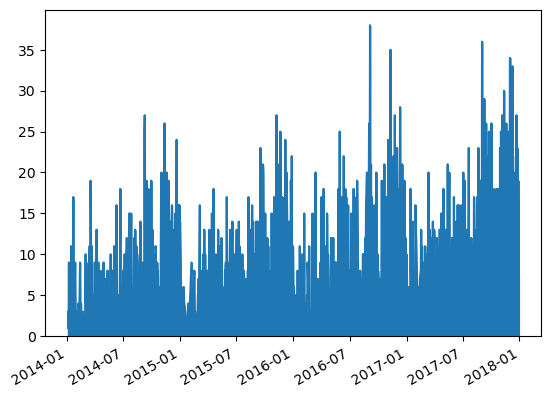

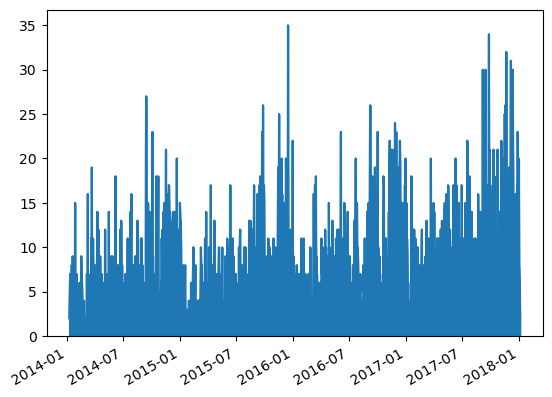

In [17]:
df_1_r["Order Date"].value_counts().sort_index().plot.area()
plt.show()

df_1_r["Ship Date"].value_counts().sort_index().plot.area()
plt.show()

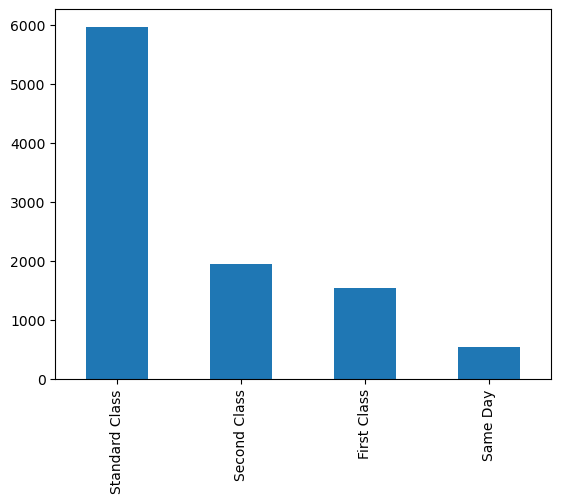

In [18]:
df_1_r["Ship Mode"].value_counts().plot.bar()
plt.show()

### Customer information (Customer ID, Customer Name, Customer Segment)

In [19]:
cust_id_set = df_1_r["Customer ID"].unique()

# does every customer id map to 1 name, as it should ?
max_mapping = 0
for cust_id_i in cust_id_set:
    cust_names_i = []
    unique_cust_names = set(df_1_r[df_1_r["Customer ID"] == cust_id_i]["Customer Name"].tolist())
    print('Customer ID: {}  -->  Names: {}'.format(cust_id_i, unique_cust_names))
    num_cust_names = len(unique_cust_names)
    max_mapping = max(max_mapping, num_cust_names)

print(max_mapping)

Customer ID: CG-12520  -->  Names: {'Claire Gute'}
Customer ID: DV-13045  -->  Names: {'Darrin Van Huff'}
Customer ID: SO-20335  -->  Names: {"Sean O'Donnell"}
Customer ID: BH-11710  -->  Names: {'Brosina Hoffman'}
Customer ID: AA-10480  -->  Names: {'Andrew Allen'}
Customer ID: IM-15070  -->  Names: {'Irene Maddox'}
Customer ID: HP-14815  -->  Names: {'Harold Pawlan'}
Customer ID: PK-19075  -->  Names: {'Pete Kriz'}
Customer ID: AG-10270  -->  Names: {'Alejandro Grove'}
Customer ID: ZD-21925  -->  Names: {'Zuschuss Donatelli'}
Customer ID: KB-16585  -->  Names: {'Ken Black'}
Customer ID: SF-20065  -->  Names: {'Sandra Flanagan'}
Customer ID: EB-13870  -->  Names: {'Emily Burns'}
Customer ID: EH-13945  -->  Names: {'Eric Hoffmann'}
Customer ID: TB-21520  -->  Names: {'Tracy Blumstein'}
Customer ID: MA-17560  -->  Names: {'Matt Abelman'}
Customer ID: GH-14485  -->  Names: {'Gene Hale'}
Customer ID: SN-20710  -->  Names: {'Steve Nguyen'}
Customer ID: LC-16930  -->  Names: {'Linda Cazamia

Customer ID: AH-10075  -->  Names: {'Adam Hart'}
Customer ID: JM-15535  -->  Names: {'Jessica Myrick'}
Customer ID: JJ-15760  -->  Names: {'Joel Jenkins'}
Customer ID: RK-19300  -->  Names: {'Ralph Kennedy'}
Customer ID: CG-12040  -->  Names: {'Catherine Glotzbach'}
Customer ID: RP-19270  -->  Names: {'Rachel Payne'}
Customer ID: KC-16255  -->  Names: {'Karen Carlisle'}
Customer ID: KH-16360  -->  Names: {'Katherine Hughes'}
Customer ID: GH-14665  -->  Names: {'Greg Hansen'}
Customer ID: SW-20275  -->  Names: {'Scott Williamson'}
Customer ID: JA-15970  -->  Names: {'Joseph Airdo'}
Customer ID: DL-12925  -->  Names: {'Daniel Lacy'}
Customer ID: LW-16990  -->  Names: {'Lindsay Williams'}
Customer ID: TB-21190  -->  Names: {'Thomas Brumley'}
Customer ID: BS-11800  -->  Names: {'Bryan Spruell'}
Customer ID: RW-19690  -->  Names: {'Robert Waldorf'}
Customer ID: TZ-21580  -->  Names: {'Tracy Zic'}
Customer ID: AS-10630  -->  Names: {'Ann Steele'}
Customer ID: TS-21340  -->  Names: {'Toby Swi

Customer ID: MA-17995  -->  Names: {'Michelle Arnett'}
Customer ID: AY-10555  -->  Names: {'Andy Yotov'}
Customer ID: GB-14575  -->  Names: {'Giulietta Baptist'}
Customer ID: JB-16045  -->  Names: {'Julia Barnett'}
Customer ID: MG-17875  -->  Names: {'Michael Grace'}
Customer ID: SR-20425  -->  Names: {'Sharelle Roach'}
Customer ID: JB-16000  -->  Names: {'Joy Bell-'}
Customer ID: DM-12955  -->  Names: {'Dario Medina'}
Customer ID: TC-21475  -->  Names: {'Tony Chapman'}
Customer ID: SW-20350  -->  Names: {'Sean Wendt'}
Customer ID: RE-19450  -->  Names: {'Richard Eichhorn'}
Customer ID: BF-11215  -->  Names: {'Benjamin Farhat'}
Customer ID: KB-16405  -->  Names: {'Katrina Bavinger'}
Customer ID: JG-15310  -->  Names: {'Jason Gross'}
Customer ID: EC-14050  -->  Names: {'Erin Creighton'}
Customer ID: EB-14110  -->  Names: {'Eugene Barchas'}
Customer ID: JP-15460  -->  Names: {'Jennifer Patt'}
Customer ID: CS-11845  -->  Names: {'Cari Sayre'}
Customer ID: GH-14410  -->  Names: {'Gary Hans

`note` every customer id in the data does map only to 1 name

In [20]:
print("# Customer IDs: {}".format(int(df_1_r["Customer ID"].nunique())))
print("# Customer Names: {}".format(int(df_1_r["Customer Name"].nunique())))

# Customer IDs: 793
# Customer Names: 793


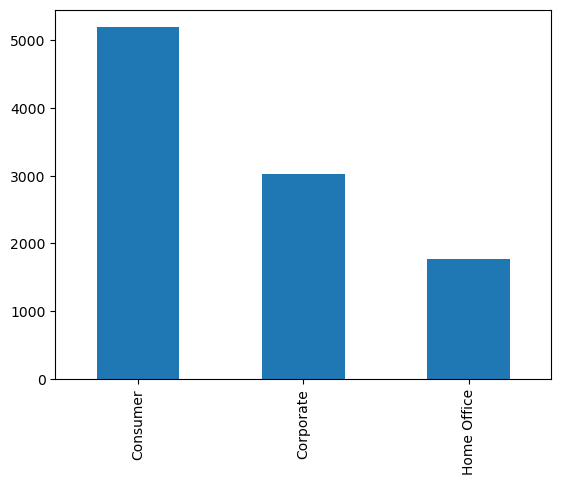

In [21]:
df_1_r["Segment"].value_counts().plot.bar()
plt.show()

###  Location Info (Country, City, State, Postal Code, Region)

In [22]:
print("Countries in the data: {}".format(df_1_r['Country'].nunique()))
print("Cities in the data: {}".format(df_1_r['City'].nunique()))
print("States in the data: {}".format(df_1_r['State'].nunique()))
print("Regions in the data: {}".format(df_1_r['Region'].nunique()))
print("Postal Codes in the data: {}".format(df_1_r['Postal Code'].nunique()))

Countries in the data: 1
Cities in the data: 531
States in the data: 49
Regions in the data: 4
Postal Codes in the data: 631


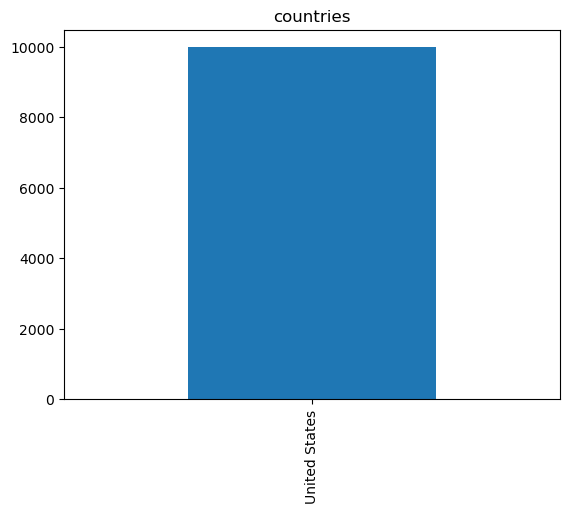

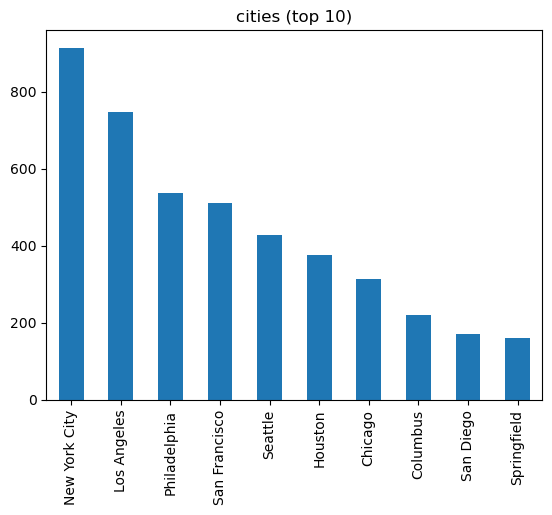

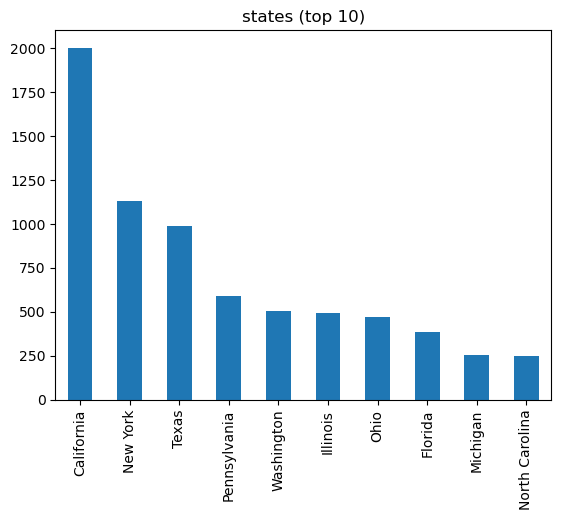

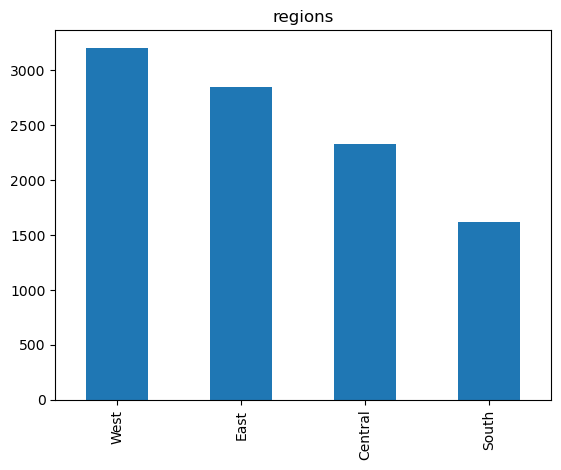

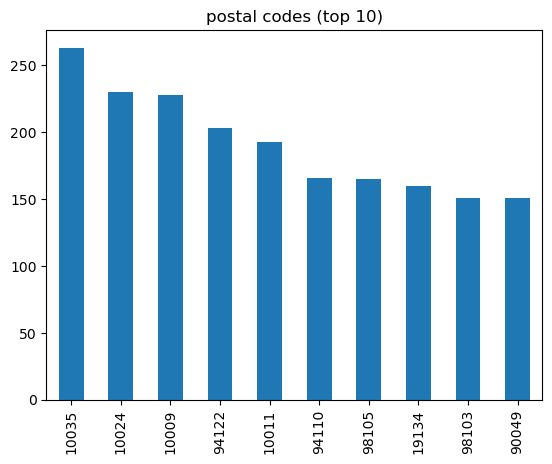

In [23]:
df_1_r["Country"].value_counts().plot.bar()
plt.title("countries")
plt.show()
df_1_r["City"].value_counts().head(10).plot.bar()
plt.title("cities (top 10)")
plt.show()
df_1_r["State"].value_counts().head(10).plot.bar()
plt.title("states (top 10)")
plt.show()
df_1_r["Region"].value_counts().plot.bar()
plt.title("regions")
plt.show()
df_1_r["Postal Code"].value_counts().head(10).plot.bar()
plt.title("postal codes (top 10)")
plt.show()

In [24]:
display(df_1_r[["Country", "State", "Region", "City", "Postal Code"]]\
                .groupby(["Country"]).count())

display(df_1_r[["Country", "Region", "State", "City", "Postal Code"]]\
                .groupby(["Country", "Region",]).count())

display(df_1_r[["Country", "Region", "State", "City", "Postal Code"]]\
                .groupby(["Country", "Region", "State"]).count())

display(df_1_r[["Country", "Region", "State", "City", "Postal Code"]]\
                .groupby(["Country", "Region", "State", "City"]).count())

display(df_1_r[["Country", "Region", "State", "City", "Postal Code", "Row ID"]]\
                .groupby(["Country", "Region", "State", "City", "Postal Code"]).count())

,State,Region,City,Postal Code
Country,,,,
United States,9986,9986,9986,9986


State  City  Postal Code
Country       Region                           
United States Central   2323  2323         2323
              East      2845  2845         2845
              South     1616  1616         1616
              West      3202  3202         3202

City  Postal Code
Country       Region  State                                  
United States Central Illinois               492          492
                      Indiana                149          149
                      Iowa                    30           30
                      Kansas                  24           24
                      Michigan               255          255
                      Minnesota               89           89
                      Missouri                66           66
                      Nebraska                38           38
                      North Dakota             7            7
                      Oklahoma                66           66
                      South Dakota            12           12
                      Texas                  985          985
                      Wisconsin              110          110
              East    Connecticut             82           82
                      Delaware                96           96
                      District of Columbia    10           10
                      Maine                    8            8
                      Maryland               104          104
                      Massachusetts          135          135
                      New Hampshire           27           27
                      New Jersey             130          130
                      New York              1127         1127
                      Ohio                   468          468
                      Pennsylvania           587          587
                      Rhode Island            56           56
                      Vermont                 11           11
                      West Virginia            4            4
              South   Alabama                 61           61
                      Arkansas                60           60
                      Florida                383          383
                      Georgia                184          184
                      Kentucky               138          138
                      Louisiana               42           42
                      Mississippi             52           52
                      North Carolina         248          248
                      South Carolina          42           42
                      Tennessee              183          183
                      Virginia               223          223
              West    Arizona                224          224
                      California            2001         2001
                      Colorado               181          181
                      Idaho                   21           21
                      Montana                 15           15
                      Nevada                  39           39
                      New Mexico              37           37
                      Oregon                 124          124
                      Utah                    53           53
                      Washington             506          506
                      Wyoming                  1            1

Postal Code
Country       Region  State      City                          
United States Central Illinois   Arlington Heights            1
                                 Aurora                      34
                                 Bloomington                  8
                                 Bolingbrook                  6
                                 Buffalo Grove                2
...                                                         ...
              West    Washington Renton                       3
                                 Seattle                    428
                                 Spokane                      7
                                 Vancouver                    5
                      Wyoming    Cheyenne                     1

[604 rows x 1 columns]

Row ID
Country       Region  State      City              Postal Code        
United States Central Illinois   Arlington Heights 60004             1
                                 Aurora            60505            34
                                 Bloomington       61701             8
                                 Bolingbrook       60440             6
                                 Buffalo Grove     60089             2
...                                                                ...
              West    Washington Seattle           98105           165
                                                   98115           112
                                 Spokane           99207             7
                                 Vancouver         98661             5
                      Wyoming    Cheyenne          82001             1

[632 rows x 1 columns]

In [25]:
location_data = df_1_r[["Country", "Region", "State", "City", "Postal Code", "Row ID"]]\
                .groupby(["Country", "Region", "State", "City", "Postal Code"]).count().reset_index()
location_data

,Country,Region,State,City,Postal Code,Row ID
0,United States,Central,Illinois,Arlington Heights,60004,1
1,United States,Central,Illinois,Aurora,60505,34
2,United States,Central,Illinois,Bloomington,61701,8
3,United States,Central,Illinois,Bolingbrook,60440,6
4,United States,Central,Illinois,Buffalo Grove,60089,2
...,...,...,...,...,...,...
627,United States,West,Washington,Seattle,98105,165
628,United States,West,Washington,Seattle,98115,112
629,United States,West,Washington,Spokane,99207,7
630,United States,West,Washington,Vancouver,98661,5


In [26]:
df_1_r[df_1_r["Postal Code"].duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


`note` data revolves around 1 country (USA) and is split into country -> region -> state -> city -> postal code

## Product Info (Product ID, Category, Sub-Category, Product Name)

In [27]:
print("Product ID: {} values".format(df_1_r["Product ID"].nunique()))
print("Product Name: {} values".format(df_1_r["Product Name"].nunique()))
print("Product Category: {} values".format(df_1_r["Category"].nunique()))
print("Product Sub-Category: {} values".format(df_1_r["Sub-Category"].nunique()))

Product ID: 1862 values
Product Name: 1850 values
Product Category: 3 values
Product Sub-Category: 17 values


`note` a product may have the same name as another product (same name but different id)

In [28]:
Product_name_id_comb = df_1_r[~df_1_r[["Product Name", "Product ID"]].duplicated()][["Product Name", "Product ID"]] 
product_name_vc = Product_name_id_comb[["Product Name"]].value_counts()
product_name_list = list(map(lambda x: x[0], product_name_vc[product_name_vc > 2].index.to_list()))

print("Product Names that have more than one id: \n{}".format(product_name_list))


Product Names that have more than one id: 
['Staples', 'Staple envelope', 'Easy-staple paper', 'Staples in misc. colors', 'Staple holder', 'Staple remover']


In [29]:
df_1_r[["Product Name", "Product ID"]].value_counts()

Product Name                                                               Product ID     
Situations Contoured Folding Chairs, 4/Set                                 FUR-CH-10002647    15
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling                  TEC-AC-10003628    15
GBC Premium Transparent Covers with Diagonal Lined Pattern                 OFF-BI-10001524    14
Global Wood Trimmed Manager's Task Chair, Khaki                            FUR-CH-10003774    14
Global High-Back Leather Tilter, Burgundy                                  FUR-CH-10002880    14
                                                                                              ..
Belkin 8 Outlet SurgeMaster II Gold Surge Protector with Phone Protection  OFF-AP-10001124     1
Fellowes Smart Surge Ten-Outlet Protector, Platinum                        OFF-AP-10003884     1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room                          OFF-AP-10002734     1
Wasp CCD Handheld Bar Code Reader   

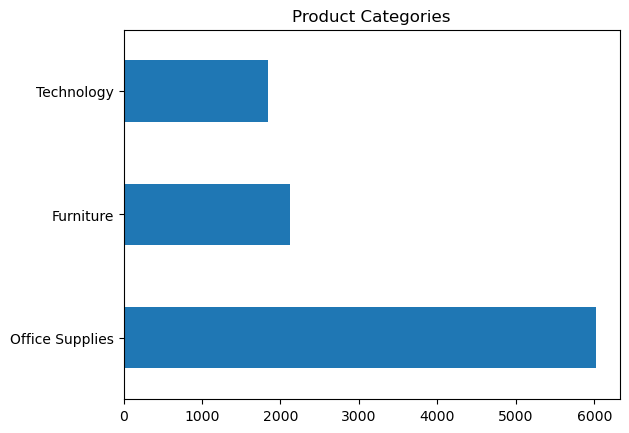

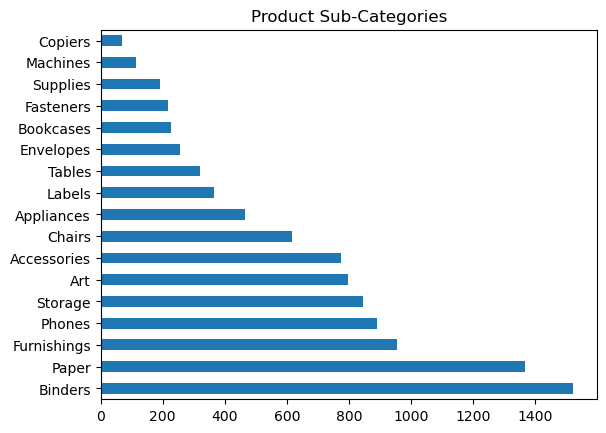

In [30]:
df_1_r["Category"].value_counts().plot.barh()
plt.title("Product Categories")
plt.show()

df_1_r["Sub-Category"].value_counts().plot.barh()
plt.title("Product Sub-Categories")
plt.show()

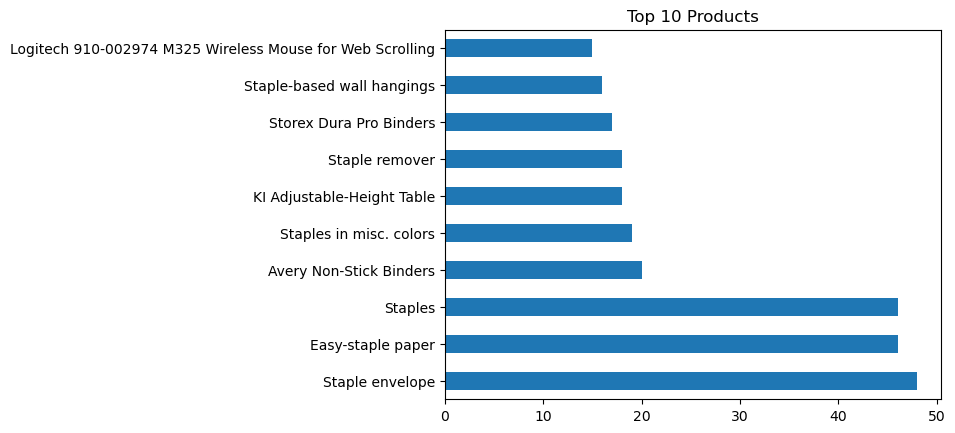

In [31]:
df_1_r["Product Name"].value_counts()[:10].plot.barh()
plt.title("Top 10 Products")
plt.show()

## Sale ID (Sales, Quantity, Discount, Profit)

make column profit_per_unit

In [32]:
df_1_re = df_1_r.copy()

In [33]:
df_1_re["Profit (per-unit)"] = df_1_re["Profit"] / df_1_re["Quantity"]

`Q: What are the products that generate the most profit?`

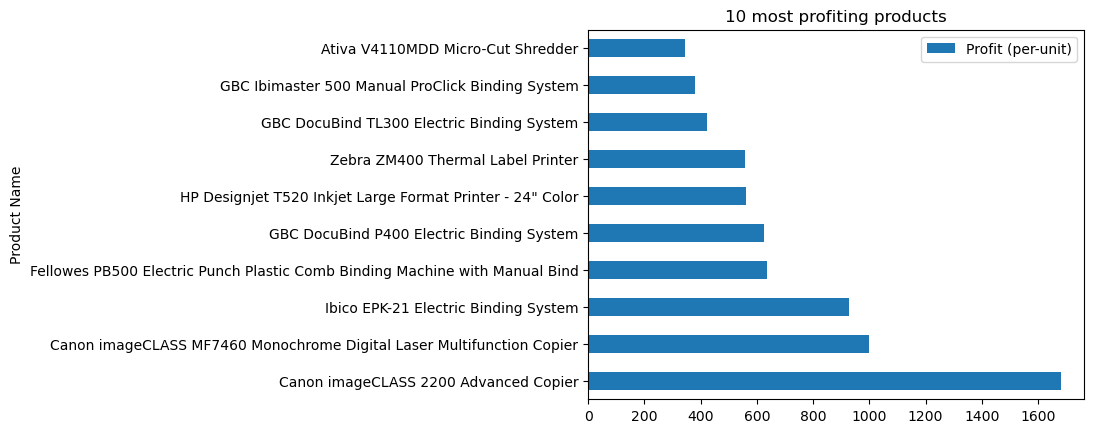

In [34]:
# Note: ppu: profit per unit

top_10_ppu= df_1_re.groupby(["Product Name"]).max()[["Profit (per-unit)"]]\
                    .sort_values(by=['Profit (per-unit)'], ascending=False)[:10]

top_10_ppu.plot.barh()
plt.title("10 most profiting products")
plt.show()

Q: What categories generate the most sales?

/tmp/ipykernel_377048/2253503089.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_1_re.groupby(["Category"]).sum()\


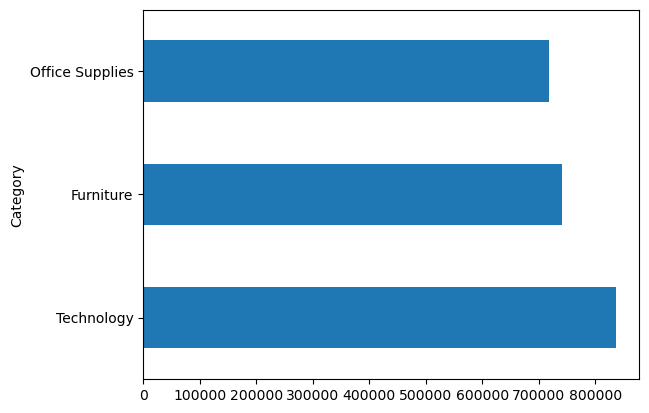

In [35]:
df_1_re.groupby(["Category"]).sum()\
        .sort_values(by=['Sales'], ascending=False)["Sales"].plot.barh()
plt.show()

/tmp/ipykernel_377048/4284490171.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_1_re.groupby(["Category", "Sub-Category"]).sum()\


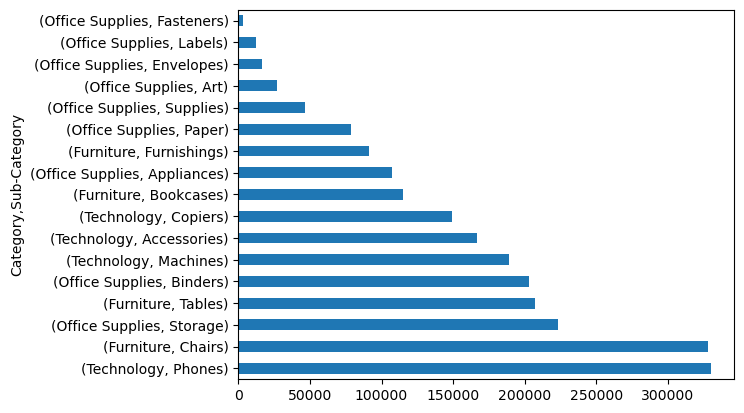

In [36]:
df_1_re.groupby(["Category", "Sub-Category"]).sum()\
        .sort_values(by=['Sales'], ascending=False)["Sales"].plot.barh()
plt.show()

In [37]:
df_1_re = df_1_re.drop(columns=["Profit (per-unit)"])

In [39]:
df_1_re.to_csv("../Datasets/processed/1_re.csv", index=False)